# Sprint 4 

# Tasca M4 T01

## Ejercicio 1

### Extrae el data set  preu lloguer per trimestre i barri.csv y resumirlo estadística y gráficamente

Primero se importan las librerías de _Pandas, Matplotlib_ y _Seaborn_.  Así mismo se usa el comando `%matplotlib inline` para que los gráficos se muestren en la misma celda y así facilitar la exploración y el análisis de los datos.

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Después se descarga el archivo de **'preu lloguer per trimestre i barri'** y se crea el dataframe que se usará durante este ejercicio.

También se revisa la información más a detalle.

In [2]:
pd.read_csv('preu lloguer per trimestre i barri.csv')

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


In [3]:
df_alquiler = pd.read_csv('preu lloguer per trimestre i barri.csv')
df_alquiler.shape

(584, 8)

In [4]:
df_alquiler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


Lo que podemos observar es que el dataset es pequeño con solo 8 columnas y 584 filas, por lo que no es necesario quitar ninguna columna.  

También observamos que los datatype son intergers y objetos lo que no cuadra con los títulos de las columnas, como por ejemplo, la columna _Preu_ que debería ser interger, o la columna _Trimestre_ que debería ser object.

Procedemos a revisar la información más a detalle y hacemos los cambios necesarios.

In [6]:
df_alquiler.describe()

,Any,Trimestre,Codi_Districte,Codi_Barri
count,584.0,584.000000,584.000000,584.000000
mean,2021.0,2.500000,6.246575,37.000000
std,0.0,1.118992,2.790726,21.089371
min,2021.0,1.000000,1.000000,1.000000
25%,2021.0,1.750000,4.000000,19.000000
50%,2021.0,2.500000,7.000000,37.000000
75%,2021.0,3.250000,8.000000,55.000000
max,2021.0,4.000000,10.000000,73.000000


Efectivamente, todas las columnas que son del datatype _interger_ deberían de ser _objectos_. Un ejemplo es el año, que sólo es uno: '2021'.

Los trimestres sólo hay 4, el código de distrito 10 y barrios 73. Además de que no representan valores medibles, pero sí son categóricos.  Esto es importante tomarlo en cuenta al momento de crear gráficas y hacer un análisis.

In [7]:
df_alquiler[['Nom_Districte', 'Codi_Barri']].value_counts()

Nom_Districte        Codi_Barri
Ciutat Vella         1             8
Nou Barris           52            8
Sant Martí           68            8
                     67            8
                     66            8
                                  ..
Horta-Guinardó       42            8
                     41            8
                     40            8
                     39            8
Sarrià-Sant Gervasi  27            8
Length: 73, dtype: int64

Las columnas _Nom_Districte_ y _Nom_Barri_ están bien definidas como objetos y son simplemente nombres, por lo que no necesitan ningún cambio.

In [8]:
df_alquiler[['Lloguer_mitja', 'Preu']].value_counts()

Lloguer_mitja                                Preu 
Lloguer mitjà mensual (Euros/mes)            --       22
Lloguer mitjà per superfície (Euros/m2 mes)  --       22
                                             13.0     13
                                             12.7     11
                                             12.9     10
                                                      ..
Lloguer mitjà mensual (Euros/mes)            747.5     1
                                             747.4     1
                                             745.9     1
                                             745.4     1
Lloguer mitjà per superfície (Euros/m2 mes)  9.9       1
Length: 332, dtype: int64

La columna de _Lloguer_mitja_ nos da información de dos tipos: mensual y por superficie.

Lo más interesante es la columna _Preu_ primero porque debería ser interger, ya que son valores numéricos medibles y segundo porque además encontramos 44 filas con un valor _"--"_ que podría ser vacío. A continuación lo comprobamos.

In [9]:
df_alquiler.isnull().sum()

Any               0
Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Lloguer_mitja     0
Preu              0
dtype: int64

### Cambios al dataset.

Con la información que acabamos de recabar, podemos hacer los cambios de _datatype_ a las columnas de _Any, Trimestre, Codi_Districte y Codi_Barri_ de interger a objeto.

In [10]:
df_alquiler[['Any', 'Trimestre', 'Codi_Districte', 'Codi_Barri']] = df_alquiler[['Any', 'Trimestre', 
                                                                                 'Codi_Districte', 'Codi_Barri']].astype(object)

Una vez hechos los cambios, comprobamos que sean correctos y volvemos a revisarlos.

In [11]:
df_alquiler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    object
 1   Trimestre       584 non-null    object
 2   Codi_Districte  584 non-null    object
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    object
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: object(8)
memory usage: 36.6+ KB


La columna _Preu_ no se puede cambiar ya que primero debemos encontrar los valores _"--"_ 

In [12]:
df_alquiler[df_alquiler.eq('--').any(axis=1, skipna=True)].reset_index(drop=True)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),--
1,2021,1,7,Horta-Guinardó,42,la Clota,Lloguer mitjà mensual (Euros/mes),--
2,2021,1,8,Nou Barris,47,Can Peguera,Lloguer mitjà mensual (Euros/mes),--
3,2021,1,8,Nou Barris,54,Torre Baró,Lloguer mitjà mensual (Euros/mes),--
4,2021,1,8,Nou Barris,56,Vallbona,Lloguer mitjà mensual (Euros/mes),--
5,2021,1,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà mensual (Euros/mes),--
6,2021,1,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà per superfície (Euros/m2 mes),--
7,2021,1,7,Horta-Guinardó,42,la Clota,Lloguer mitjà per superfície (Euros/m2 mes),--
8,2021,1,8,Nou Barris,47,Can Peguera,Lloguer mitjà per superfície (Euros/m2 mes),--
9,2021,1,8,Nou Barris,54,Torre Baró,Lloguer mitjà per superfície (Euros/m2 mes),--


Podemos ver que el valor "--" está distribuido en todos los trimestres, 4 distritos y 6 barrios diferentes. Esta información puede ser relevante más adelante.

Hacemos el cambio de "--" a "0" por el momento y así poder hacer el cambio de object a float. Después confirmamos que se hicieron los cambios en todas las columnas.

In [13]:
df_alquiler['Preu'] = df_alquiler['Preu'].replace('--', '0')
df_alquiler.loc[df_alquiler['Preu'] == '0']

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
11,2021,1,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),0
41,2021,1,7,Horta-Guinardó,42,la Clota,Lloguer mitjà mensual (Euros/mes),0
46,2021,1,8,Nou Barris,47,Can Peguera,Lloguer mitjà mensual (Euros/mes),0
53,2021,1,8,Nou Barris,54,Torre Baró,Lloguer mitjà mensual (Euros/mes),0
55,2021,1,8,Nou Barris,56,Vallbona,Lloguer mitjà mensual (Euros/mes),0
57,2021,1,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà mensual (Euros/mes),0
84,2021,1,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà per superfície (Euros/m2 mes),0
114,2021,1,7,Horta-Guinardó,42,la Clota,Lloguer mitjà per superfície (Euros/m2 mes),0
119,2021,1,8,Nou Barris,47,Can Peguera,Lloguer mitjà per superfície (Euros/m2 mes),0
126,2021,1,8,Nou Barris,54,Torre Baró,Lloguer mitjà per superfície (Euros/m2 mes),0


In [14]:
df_alquiler['Preu'] = df_alquiler['Preu'].astype(float)
df_alquiler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             584 non-null    object 
 1   Trimestre       584 non-null    object 
 2   Codi_Districte  584 non-null    object 
 3   Nom_Districte   584 non-null    object 
 4   Codi_Barri      584 non-null    object 
 5   Nom_Barri       584 non-null    object 
 6   Lloguer_mitja   584 non-null    object 
 7   Preu            584 non-null    float64
dtypes: float64(1), object(7)
memory usage: 36.6+ KB


Los cambios se hicieron en todas las columnas, sin embargo, todavía se tiene que revisar la columna _Preu_ pues las 44 filas con 0 podrían afectar los datos.

In [15]:
pd.options.display.float_format = '{:.2f}'.format
df_alquiler.describe()

,Preu
count,584.00
mean,408.84
std,455.01
min,0.00
25%,12.10
50%,15.35
75%,804.77
max,1816.50


array([[<Axes: title={'center': 'Preu'}>]], dtype=object)

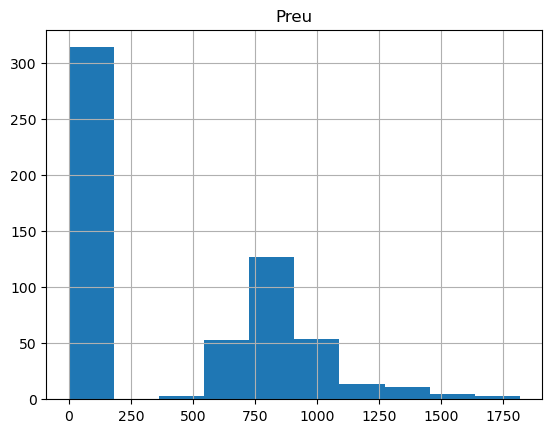

In [16]:
df_alquiler.hist(bins=10)

Efectivamente, el número de columnas con "0" es muy grande por lo que se tiene que arreglar con la información conocida.  

Anteriormente nos dimos cuenta que sólo son 6 barrios los que presentan este problema por lo que podemos analizarlos uno por uno y así decidir como llenar esos valores en "0".  

Comenzamos con el barrio _Baró de Viver_.

In [17]:
df_alquiler.loc[df_alquiler['Nom_Barri'] == 'Baró de Viver'].reset_index(drop=True)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà mensual (Euros/mes),0.00
1,2021,1,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà per superfície (Euros/m2 mes),0.00
2,2021,2,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà mensual (Euros/mes),447.50
3,2021,2,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà per superfície (Euros/m2 mes),6.70
4,2021,3,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà mensual (Euros/mes),0.00
5,2021,3,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà per superfície (Euros/m2 mes),0.00
6,2021,4,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà mensual (Euros/mes),616.70
7,2021,4,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà per superfície (Euros/m2 mes),9.20


Al hacer el primer filtro con el barrio _Baró de Viver_ nos damos cuenta que la columna _LLoguer_mitja_ tiene dos valores que deberían estar por separado pues son dos conceptos diferentes.

Para comprobar esto, filtramos el barrio de _el Raval_ que tiene la información completa.

In [18]:
df_alquiler.loc[df_alquiler['Nom_Barri'] == 'el Raval'].sort_values(by='Lloguer_mitja').reset_index(drop=True)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.20
1,2021,2,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),774.20
2,2021,3,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),770.50
3,2021,4,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),772.80
4,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),12.80
5,2021,2,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),12.90
6,2021,3,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),12.90
7,2021,4,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),13.10


Podemos comprobar que la columna _Lloguer_mitja_ debería estar separada en _Lloguer mitjà mensual (Euros/mes)_ y en _Lloguer mitjà per superfície (Euros/m2 mes)_ pues son dos conceptos diferentes y al estar unidos en una columna, afecta directamente a los precios y futuros análisis que se puedieran hacer.

Para corregir esto, debemos separar la columna de _Lloguer_mitja_ en mes y superficie. 

**Separacion de columnas**

Para poder hacer la separación, primero debemos filtrar en dos dataframe diferentes para hacer los cambios y después volver a unirlos.

Comenzamos haciendo una copia en la cual trabajaremos. 

Después creamos dos nuevos dataframes, uno con la información de _Lloguer mitjà mensual (Euros/mes)_ el cual llamaremos `mensual` y otro con los precios de _Lloguer mitjà per superfície (Euros/m2 mes)_ que se llamará `superficie`. Confirmamos que ambos tienen el mismo tamaño. 

In [19]:
df_copia = df_alquiler.copy()

In [20]:
mensual = df_copia.loc[df_copia['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)'].reset_index(drop=True)
superficie = df_copia.loc[df_copia['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)'].reset_index(drop=True)

In [21]:
mensual.shape

(292, 8)

In [22]:
superficie.shape

(292, 8)

Una vez creados los dos datasets que necesitamos, agregamos sufijos a cada columna para distinguirlas entre ellas y confirmamos los nombres de las columnas.

In [23]:
mensual = mensual.add_suffix('_mes')
superficie =superficie.add_suffix('_superficie')

In [24]:
mensual.columns

Index(['Any_mes', 'Trimestre_mes', 'Codi_Districte_mes', 'Nom_Districte_mes',
       'Codi_Barri_mes', 'Nom_Barri_mes', 'Lloguer_mitja_mes', 'Preu_mes'],
      dtype='object')

In [25]:
superficie.columns

Index(['Any_superficie', 'Trimestre_superficie', 'Codi_Districte_superficie',
       'Nom_Districte_superficie', 'Codi_Barri_superficie',
       'Nom_Barri_superficie', 'Lloguer_mitja_superficie', 'Preu_superficie'],
      dtype='object')

Una vez que se han diferenciado los dataframes, procedemos a unirlos.

In [26]:
mensual = mensual.join(superficie, how='left')

Nos deshacemos de las columnas que no necesitamos y renombramos las columnas.

In [27]:
mensual.drop(['Any_superficie', 'Trimestre_superficie', 
              'Codi_Districte_superficie', 'Nom_Districte_superficie', 
              'Codi_Barri_superficie', 'Nom_Barri_superficie'], axis=1, inplace=True)

In [28]:
mensual.shape

(292, 10)

In [29]:
mensual = mensual.rename(columns=lambda x: x.replace('_mes', '')).reset_index(drop=True)
mensual.head(3)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu,Lloguer_mitja_superficie,Preu_superficie
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.20,Lloguer mitjà per superfície (Euros/m2 mes),12.80
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.60,Lloguer mitjà per superfície (Euros/m2 mes),12.30
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.90,Lloguer mitjà per superfície (Euros/m2 mes),15.50


Una vez separadas las columnas, actualizamos el dataframe original y revisamos las columnas _Preu_ y _Preu_superficie_ para confirmar que todo haya salido bien.

In [30]:
df_alquiler = mensual.copy()

In [31]:
df_alquiler.describe()

,Preu,Preu_superficie
count,292.00,292.00
mean,805.93,11.76
std,313.58,3.74
min,0.00,0.00
25%,703.35,11.40
50%,804.95,12.65
75%,927.75,13.53
max,1816.50,18.00


array([[<Axes: title={'center': 'Preu'}>,
        <Axes: title={'center': 'Preu_superficie'}>]], dtype=object)

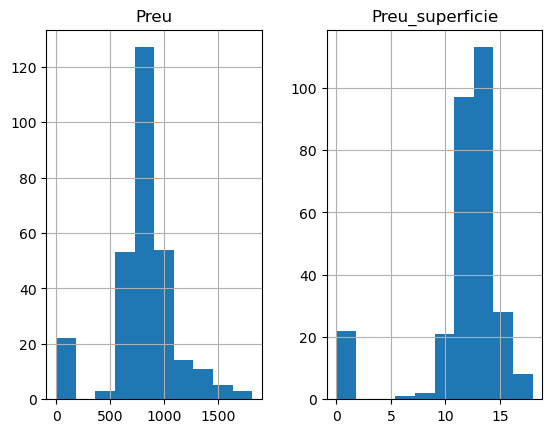

In [32]:
df_alquiler.hist(bins=10)

Vemos que efectivamente hay una diferencia importante de las columnas con "0".  En ambos casos es más del 20% por lo que debemos limpiarlas.  

Sabemos que sólo son 6 barrios, por lo que será sencillo hacerlo uno por uno.

Primero que nada, cambiamos los valores de 0 a NaN para poder aplicar más métodos y comenzamos a hacer los cambios barrio por barrio.

In [33]:
import numpy as np
df_alquiler.replace(0, np.nan, inplace=True)

**Barrio Baro**

Comenzamos con el barrio _Baró de Viver_ que solo tiene 4 entradas por lo que repetiremos los datos en los trimestres "1 y 2", "3 y 4".

In [34]:
df_alquiler.loc[df_alquiler['Nom_Barri'] == 'Baró de Viver']

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu,Lloguer_mitja_superficie,Preu_superficie
57,2021,1,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà mensual (Euros/mes),NaN,Lloguer mitjà per superfície (Euros/m2 mes),NaN
130,2021,2,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà mensual (Euros/mes),447.50,Lloguer mitjà per superfície (Euros/m2 mes),6.70
203,2021,3,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà mensual (Euros/mes),NaN,Lloguer mitjà per superfície (Euros/m2 mes),NaN
276,2021,4,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà mensual (Euros/mes),616.70,Lloguer mitjà per superfície (Euros/m2 mes),9.20


In [35]:
df_alquiler.loc[df_alquiler['Nom_Barri'] == 'Baró de Viver', 'Preu'] = df_alquiler.loc[df_alquiler['Nom_Barri'] == 'Baró de Viver', 'Preu'].bfill()
df_alquiler.loc[df_alquiler['Nom_Barri'] == 'Baró de Viver', 'Preu_superficie'] = df_alquiler.loc[df_alquiler['Nom_Barri'] == 'Baró de Viver', 'Preu_superficie'].bfill()

In [36]:
df_alquiler.loc[df_alquiler['Nom_Barri'] == 'Baró de Viver']

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu,Lloguer_mitja_superficie,Preu_superficie
57,2021,1,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà mensual (Euros/mes),447.50,Lloguer mitjà per superfície (Euros/m2 mes),6.70
130,2021,2,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà mensual (Euros/mes),447.50,Lloguer mitjà per superfície (Euros/m2 mes),6.70
203,2021,3,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà mensual (Euros/mes),616.70,Lloguer mitjà per superfície (Euros/m2 mes),9.20
276,2021,4,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà mensual (Euros/mes),616.70,Lloguer mitjà per superfície (Euros/m2 mes),9.20


Volvemos a revisar los otros barrios para asegurarnos que información tienen y decidir como llenar las columnas vacías.

In [37]:
df_alquiler.loc[df_alquiler['Preu'].isna()].sort_values(by='Nom_Barri')

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu,Lloguer_mitja_superficie,Preu_superficie
265,2021,4,8,Nou Barris,47,Can Peguera,Lloguer mitjà mensual (Euros/mes),NaN,Lloguer mitjà per superfície (Euros/m2 mes),NaN
46,2021,1,8,Nou Barris,47,Can Peguera,Lloguer mitjà mensual (Euros/mes),NaN,Lloguer mitjà per superfície (Euros/m2 mes),NaN
192,2021,3,8,Nou Barris,47,Can Peguera,Lloguer mitjà mensual (Euros/mes),NaN,Lloguer mitjà per superfície (Euros/m2 mes),NaN
119,2021,2,8,Nou Barris,47,Can Peguera,Lloguer mitjà mensual (Euros/mes),NaN,Lloguer mitjà per superfície (Euros/m2 mes),NaN
53,2021,1,8,Nou Barris,54,Torre Baró,Lloguer mitjà mensual (Euros/mes),NaN,Lloguer mitjà per superfície (Euros/m2 mes),NaN
199,2021,3,8,Nou Barris,54,Torre Baró,Lloguer mitjà mensual (Euros/mes),NaN,Lloguer mitjà per superfície (Euros/m2 mes),NaN
126,2021,2,8,Nou Barris,54,Torre Baró,Lloguer mitjà mensual (Euros/mes),NaN,Lloguer mitjà per superfície (Euros/m2 mes),NaN
272,2021,4,8,Nou Barris,54,Torre Baró,Lloguer mitjà mensual (Euros/mes),NaN,Lloguer mitjà per superfície (Euros/m2 mes),NaN
128,2021,2,8,Nou Barris,56,Vallbona,Lloguer mitjà mensual (Euros/mes),NaN,Lloguer mitjà per superfície (Euros/m2 mes),NaN
201,2021,3,8,Nou Barris,56,Vallbona,Lloguer mitjà mensual (Euros/mes),NaN,Lloguer mitjà per superfície (Euros/m2 mes),NaN


Al contrario del barrio _Baró de Viver_ en el que se tenían valores de referencia, los 5 barrios restantes están vacíos por lo que llenaremos usaremos la interpolación para completarlos.

Después confirmamos que no haya ningún valor que esté vacío pues recordemos que los "0" los convertimos en "NaN".  También confirmaremos filtrando uno de los barrios de la lista.

In [38]:
df_alquiler.interpolate(inplace=True)

In [39]:
df_alquiler.isna().sum()

Any                         0
Trimestre                   0
Codi_Districte              0
Nom_Districte               0
Codi_Barri                  0
Nom_Barri                   0
Lloguer_mitja               0
Preu                        0
Lloguer_mitja_superficie    0
Preu_superficie             0
dtype: int64

In [40]:
df_alquiler.loc[df_alquiler['Nom_Barri'] == 'la Marina del Prat Vermell']

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu,Lloguer_mitja_superficie,Preu_superficie
11,2021,1,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),796.10,Lloguer mitjà per superfície (Euros/m2 mes),12.55
84,2021,2,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),773.05,Lloguer mitjà per superfície (Euros/m2 mes),12.15
157,2021,3,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),742.75,Lloguer mitjà per superfície (Euros/m2 mes),12.00
230,2021,4,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),734.90,Lloguer mitjà per superfície (Euros/m2 mes),11.95


### Análisis

Una vez limpio y formateado el dataset, proseguimos con el análisis.

Primero filtramos el Código y Nombre del Distrito para saber cuantos alquileres tiene cada uno.

In [52]:
pd.DataFrame(df_alquiler[['Codi_Districte', 'Nom_Districte']].value_counts())

,,0
Codi_Districte,Nom_Districte,
8,Nou Barris,52
7,Horta-Guinardó,44
10,Sant Martí,40
3,Sants-Montjuïc,32
9,Sant Andreu,28
2,Eixample,24
5,Sarrià-Sant Gervasi,24
6,Gràcia,20
1,Ciutat Vella,16


Graficamos la información para verla clara y sencilla.

<Axes: ylabel='Codi_Districte,Nom_Districte'>

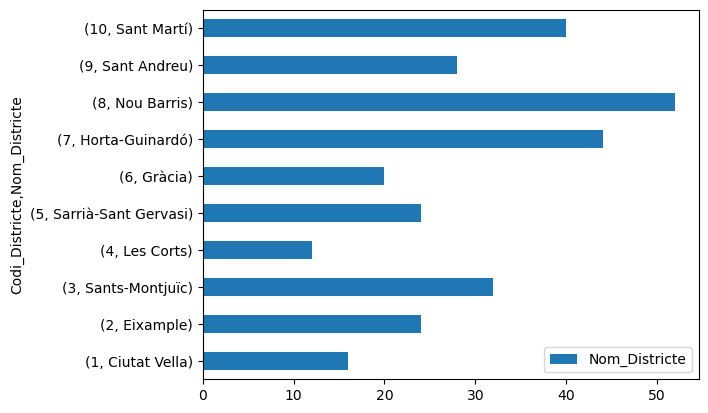

In [54]:
pd.DataFrame(df_alquiler.groupby('Codi_Districte')['Nom_Districte'].value_counts()).plot(kind='barh')
plt.savefig('Alquileres por Distrito.png')

Con la información de la tabla y de la gráfica, podemos ver claramente que _Nou Barris_ es el distrito con mayor número de alquileres y el más pequeño.

En seguida, filtramos cuantos barrios hay por distrito y lo visualizamos con un gráfico de puntos.

In [55]:
pd.DataFrame(df_alquiler.groupby('Nom_Districte')['Codi_Barri'].nunique())

,Codi_Barri
Nom_Districte,
Ciutat Vella,4
Eixample,6
Gràcia,5
Horta-Guinardó,11
Les Corts,3
Nou Barris,13
Sant Andreu,7
Sant Martí,10
Sants-Montjuïc,8


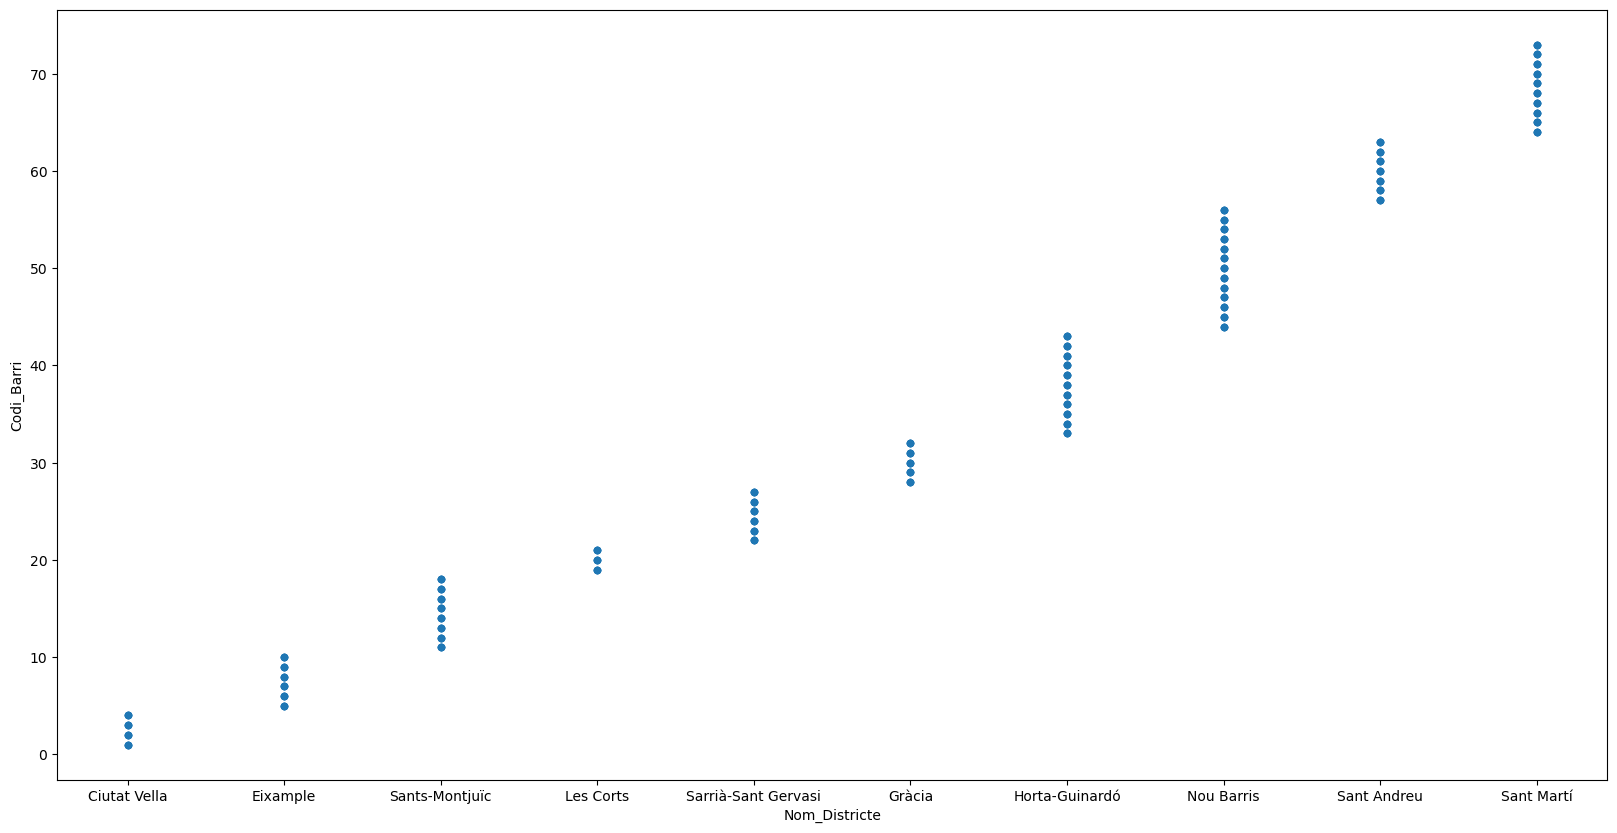

In [59]:
df_alquiler.plot(kind='scatter', x='Nom_Districte', y='Codi_Barri', figsize=(20, 10))
plt.savefig('Número de Barrios por Distrito')

Una vez más _Nou Barris_ es el distrito más grande y Les Corts el más pequeño, lo cual confirma la información por alquileres y distritos pues es constante.

A continuación, graficamos tanto _Precio por mes y por superficie_ para tener información visual de lo que contienen ambas columnas para después hacer un resumen estadístico tanto númerico, como gráfico.

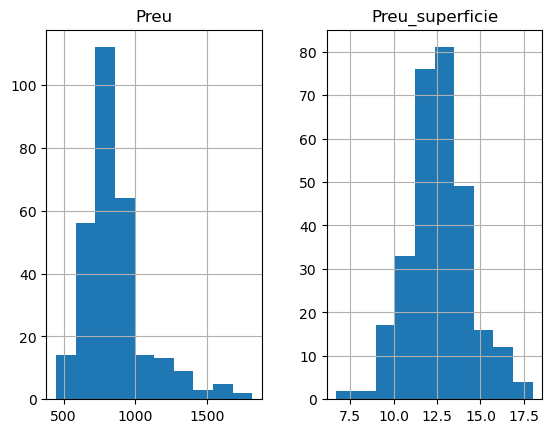

In [62]:
df_alquiler.hist(bins=10)
plt.savefig('Precios por Mes y Superficie')

Los histogramas nos muestran, primero que el _Precio del alquiler por mes_ aunque simétrico, tiene una tendencia sesgada hacia la derecha.  Esto indica que hay más alquileres entre los 500 y 1000 euros y después va en aumento.

Por otro lado, el _Precio por metro cuadrado_ o _Superficie_ es más simétrico con la media alrededor de los 13 euros, con más precios que rondan entre los 7 y 10 euros que precios mayores a 15 euros.

In [60]:
df_alquiler.describe()

,Preu,Preu_superficie
count,292.00,292.00
mean,855.78,12.57
std,221.78,1.77
min,447.50,6.70
25%,734.90,11.50
50%,808.25,12.67
75%,927.75,13.53
max,1816.50,18.00


El resumen que se presenta aquí indica que el precio de alquiler mensual en Barcelona es de 855.78 euros, pero es importante tener en cuenta que la desviación estándar es de casi 228, lo que indica una amplia variabilidad en los precios. Además, el percentil 75 se encuentra en casi 928 euros, lo que sugiere que la mayoría de los precios de alquiler son más altos que la media. En cuanto al precio por metro cuadrado, este es más constante, con una variación estándar de casi 2, lo que confirma los datos presentados en el histograma.

Para obtener información más detallada y clara, se filtraron las medias por barrio y se utilizó un diagrama de caja y bigotes (boxplot) para obtener una imagen detallada de los precios mínimos, máximos, medias, percentiles y valores atípicos tanto para el precio de alquiler mensual como para la superficie en cada barrio.

In [64]:
df_alquiler.groupby('Nom_Districte').mean()

,Preu,Preu_superficie
Nom_Districte,,
Ciutat Vella,858.92,13.78
Eixample,1000.55,13.30
Gràcia,877.26,13.38
Horta-Guinardó,768.71,12.02
Les Corts,1214.07,14.01
Nou Barris,649.90,10.74
Sant Andreu,707.69,10.92
Sant Martí,916.45,13.44
Sants-Montjuïc,794.28,12.61


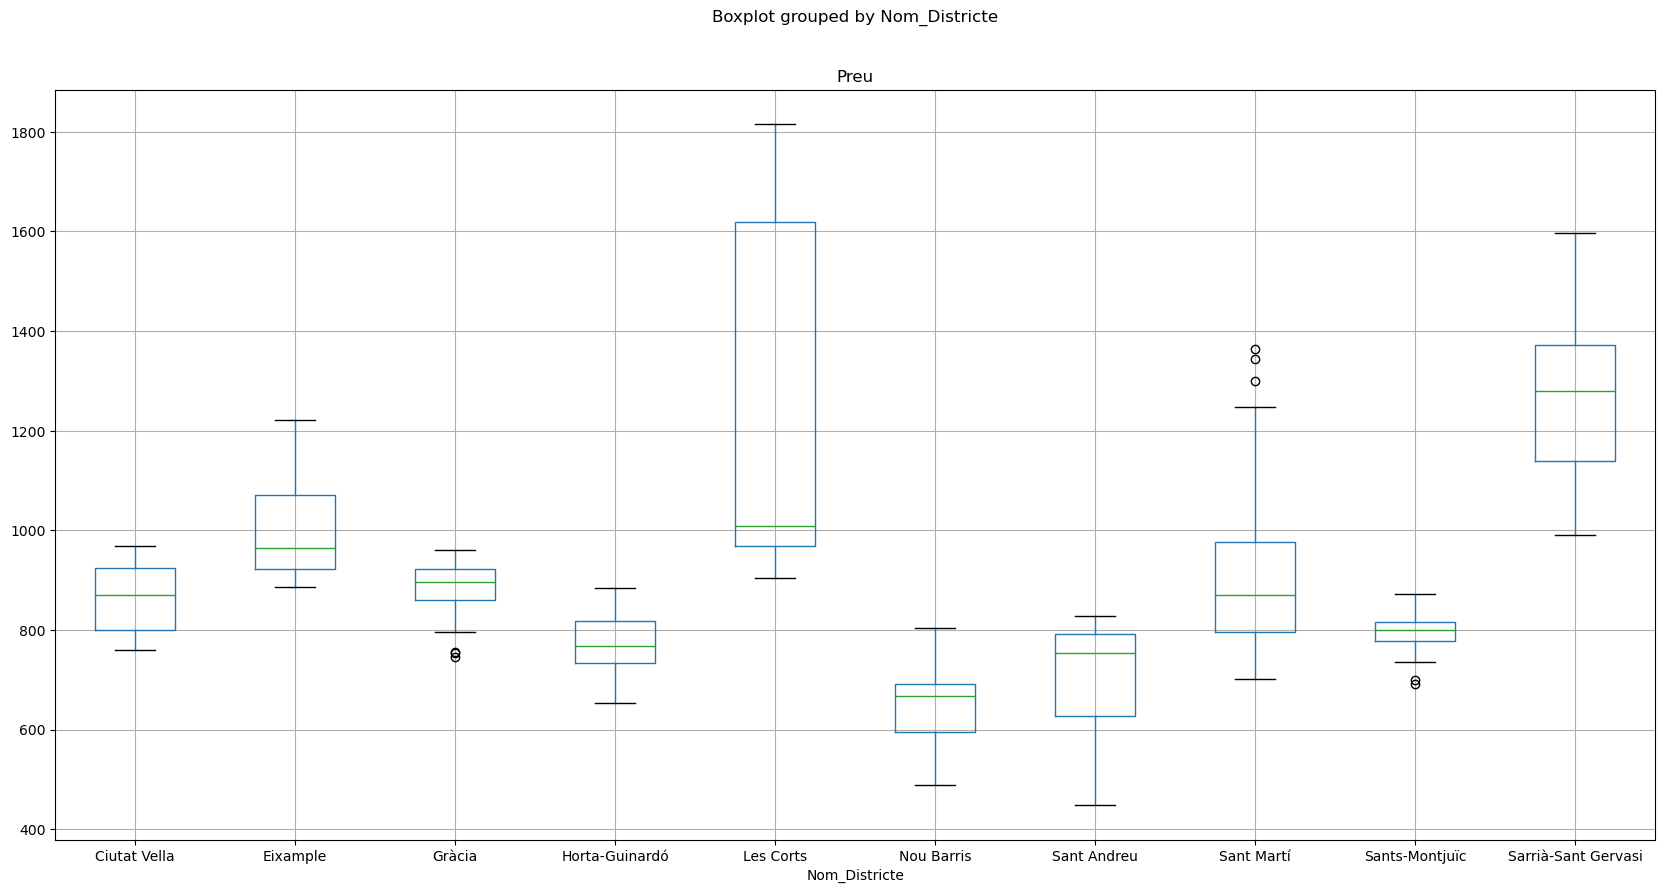

In [65]:
df_alquiler.boxplot(column='Preu', by='Nom_Districte', figsize=(20,10))
plt.savefig('Analisis por Precio por Distrito')

_Precio de alquiler por mes por superficie_

El distrito de Les Corts, a pesar de ser el más pequeño y tener menos barrios, es el más caro en términos de alquiler. Es interesante observar que aunque la media de los precios está en los 1214 euros, la mayoría de los alquileres se encuentran en el percentil 75, lo que indica que el precio es mucho más alto que la media. El segundo distrito más caro es Sarriá-Sant Gervasi, con una media cercana a los 1272 euros con una tendencia a la baja.

Por otro lado, los barrios más baratos son Nou Barris, que también es el más grande y con mayor número de alquileres. Aquí, los alquileres son más económicos que la media, con un valor de 649 euros y se encuentran en el percentil 75. Sant Andreu también tiene la mayoría de los precios en el percentil 75, pero son más bajos que la media.

En cuanto al distrito de Sants-Montjüic, muestra una distribución de precios casi simétrica, con los bigotes del mismo tamaño en ambas direcciones, aunque presenta algunos valores atípicos con una tendencia hacia precios más bajos.

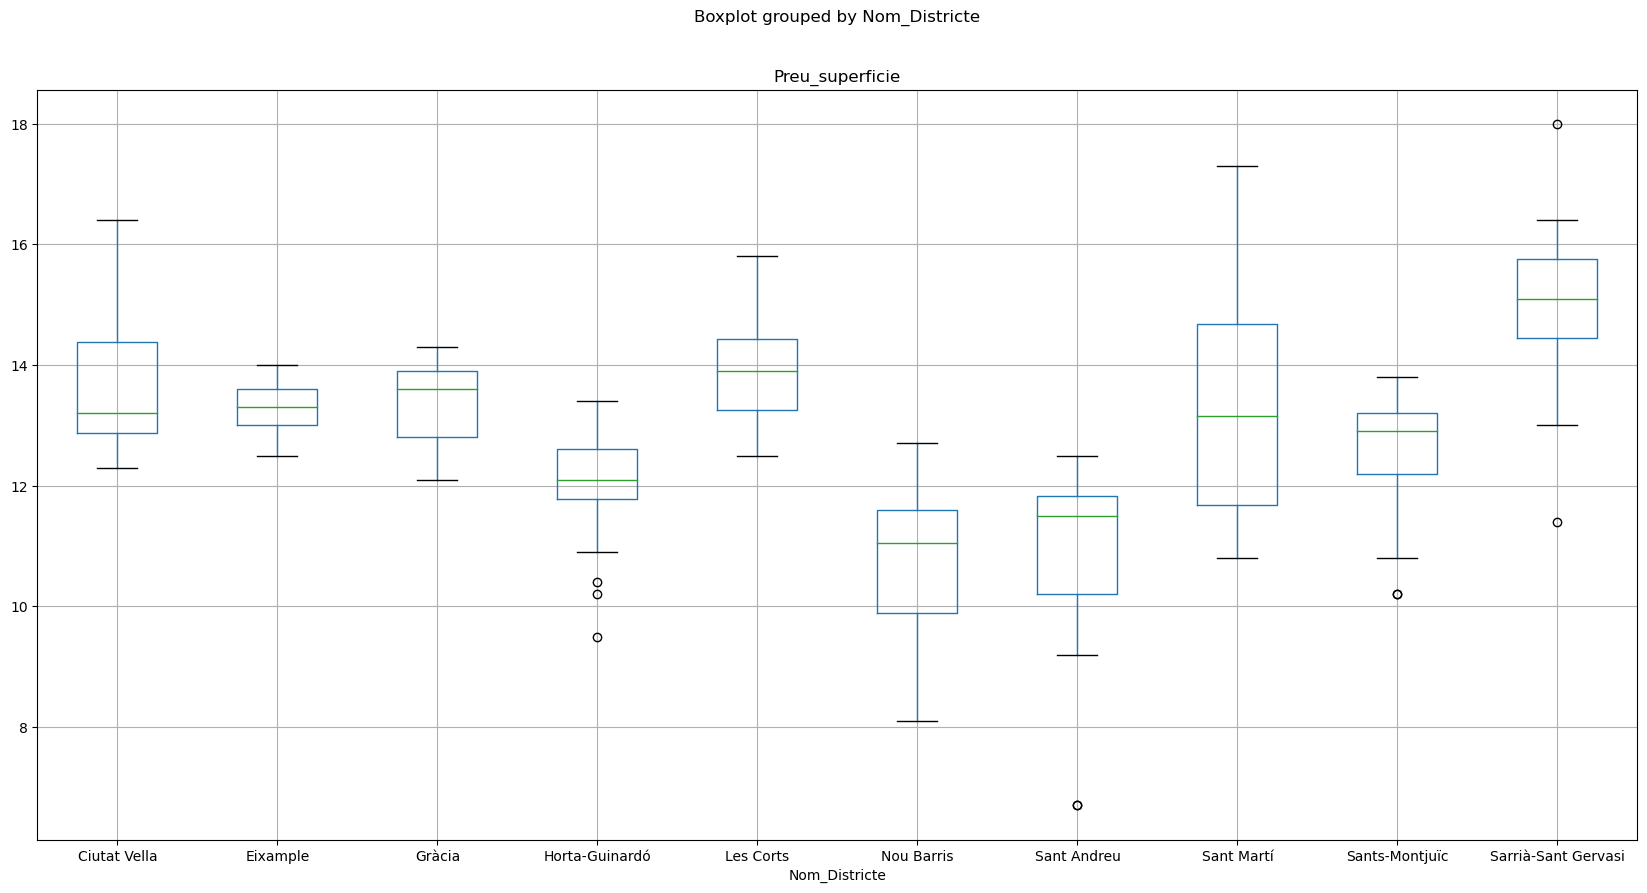

In [66]:
df_alquiler.boxplot(column='Preu_superficie', by='Nom_Districte', figsize=(20,10))
plt.savefig('Analisis por Superficie por Distrito')

_Precio por metro cuadrado de superficie_

El diagrama presenta una tendencia más simétrica en los precios por superficie, lo que confirma los datos previamente observados.

Es interesante notar que los distritos de Horta-Guinardó, Sant Andreu, y Sants-Montjüic tienen valores atípicos hacia la baja, mientras que Sarrià-Sant Gervasi presenta un valor atípico hacia arriba.

En general, las cajas tienen una distribución simétrica, con excepción de los barrios de Nou Barris, Sant Andreu, y Gracia, que presentan una tendencia hacia el percentil 25. Por otro lado, Ciutat Vella presenta una tendencia hacia el percentil 75.

### Crea al menos una visualización: 

### Una variable categorica:

La razón por la que use la visualización de _Pairplot_ es porque se varias gráficas a partir de una sola variable categórica, aunque proporciona más información de la necesaria.  Otra razón es porque quise probar una de las opciones más complicadas de la biblioteca de Seaborn.

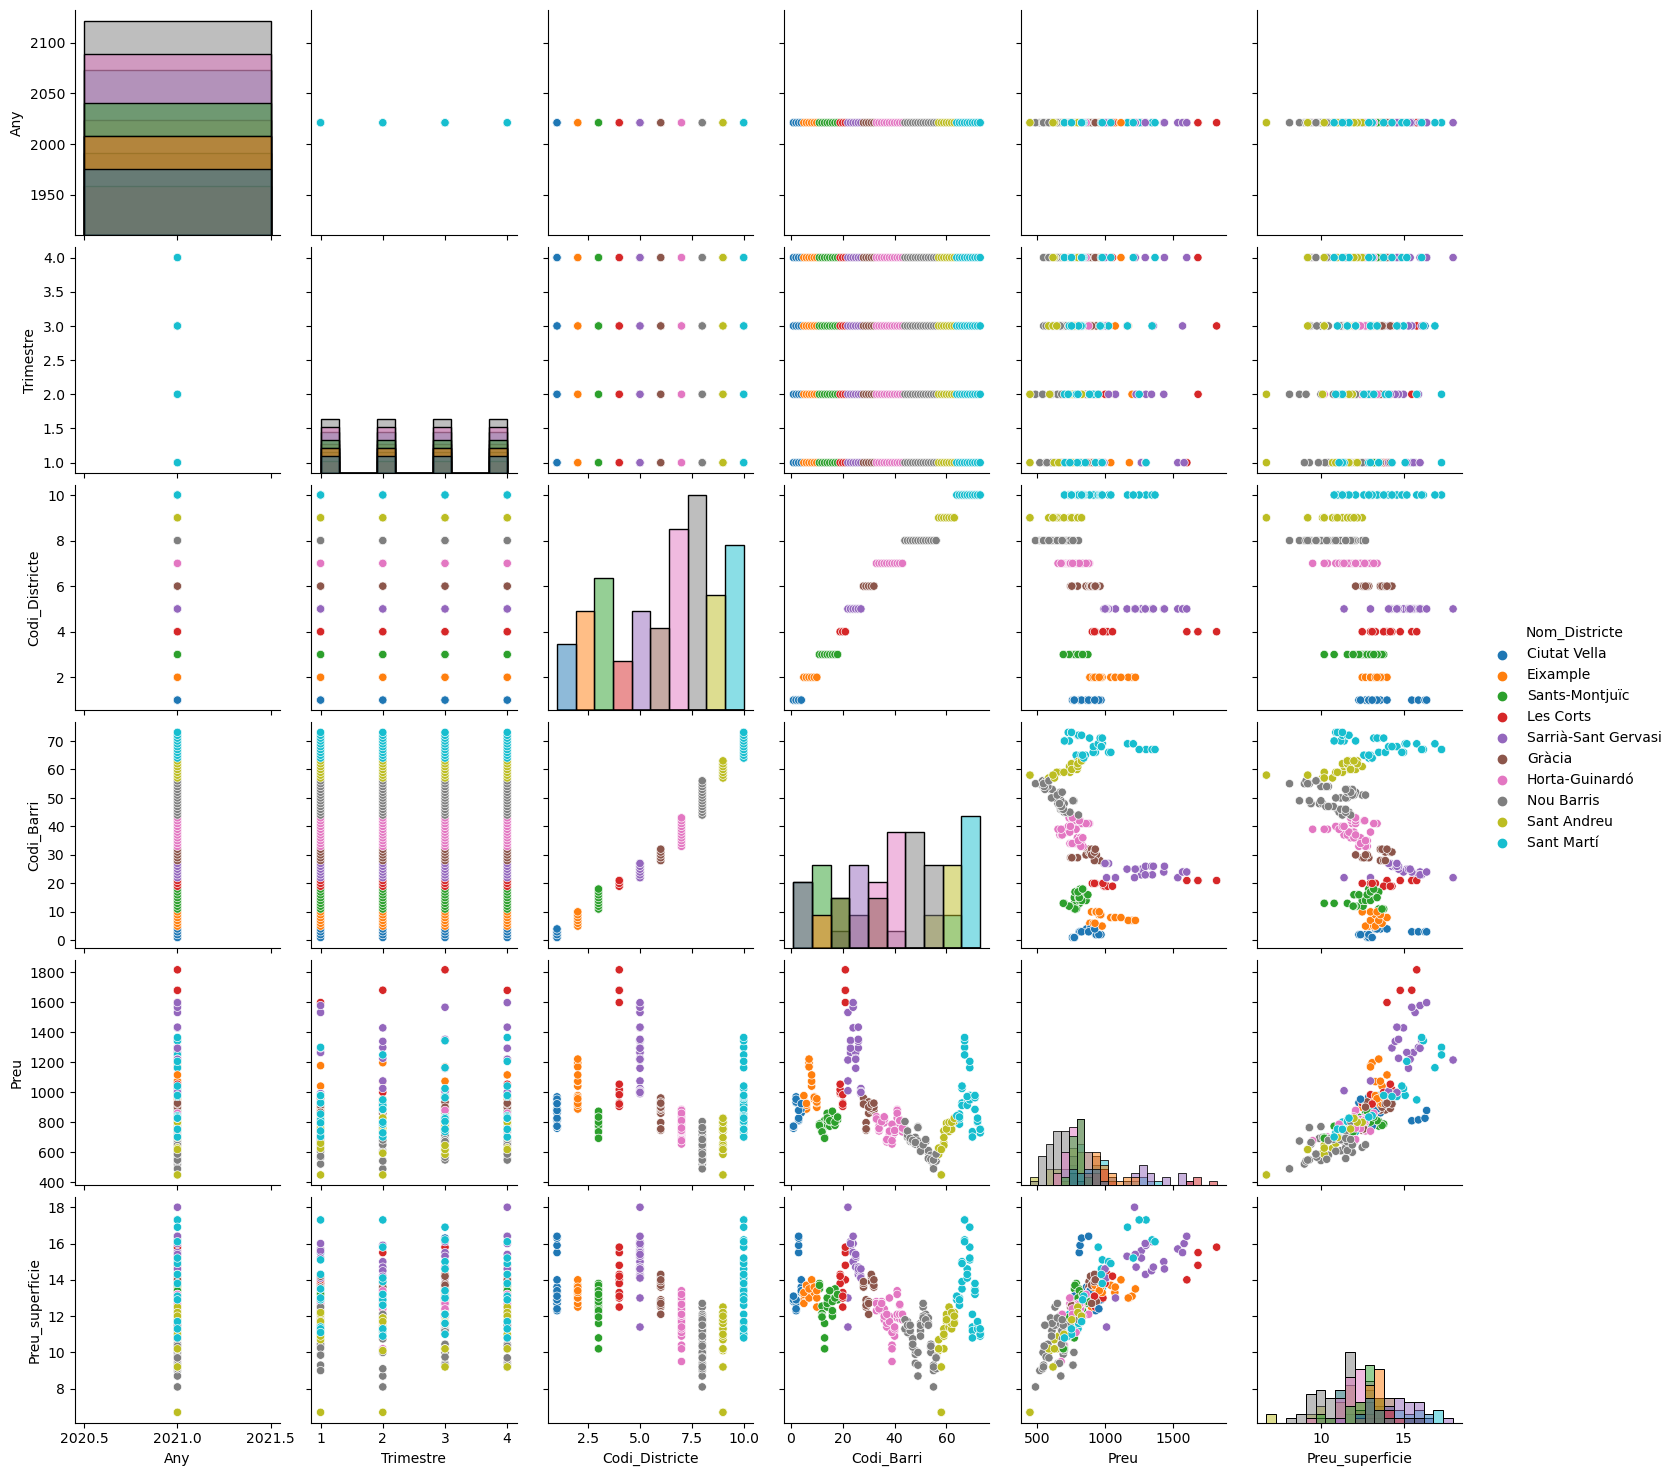

In [72]:
sns.pairplot(df_alquiler, hue='Nom_Districte', diag_kind="hist")
plt.savefig('Información General por Distrito')

### Una variable numerica

Para la variable númerica, decidimos usar el histograma de densidad, pues anteriormente se usó el histograma normal.  Aunque llama menos la atención que la gráfica anterior.

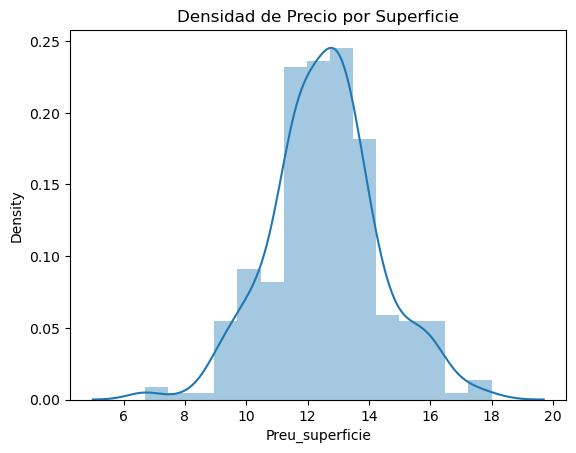

In [73]:
plt.title("Densidad de Precio por Superficie")
sns.distplot(df_alquiler['Preu_superficie'], kde=True, bins=15)
plt.savefig('Densidad de Precio por Superficie')

### Una variable numerica y una categorica

En este caso, decidí usar el _Catplot_ para tener una gráfica más compleja que una simple barra de datos.  La diferencia es que se divide la información en trimestres, aunque sigue tomando los valores de una variable numérica y una categórica.

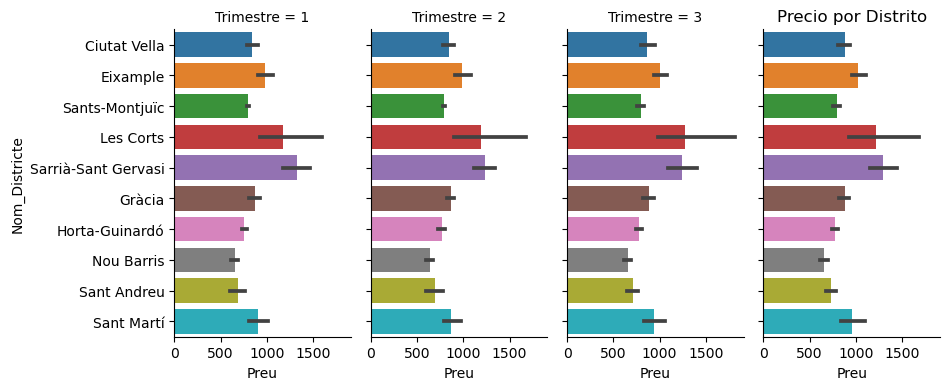

In [75]:
sns.catplot(
    data=df_alquiler, x='Preu', y='Nom_Districte', col="Trimestre",
    kind="bar", height=4, aspect=.6,)
plt.savefig('Precio por Distrito')

### Dos variables numericas

En esta ocasión, use un _Jointplot_ que une dos gráficas - Diagrama de puntos y Distribución.  Al igual que antes, decidí usar diagramas más complejos de la biblioteca de Seaborn.

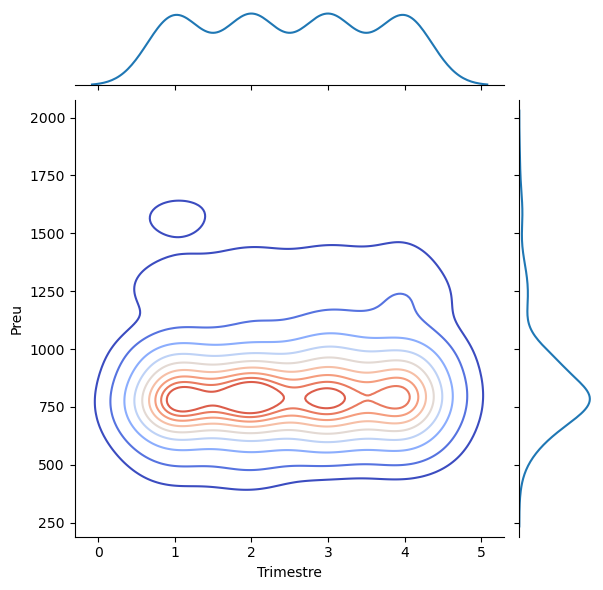

In [77]:
df_alquiler['Trimestre'] = df_alquiler['Trimestre'].astype(float)
sns.jointplot(x='Trimestre', y='Preu', data=df_alquiler, kind='kde', cmap='coolwarm')
 plt.savefig('Precio por Trimestres')

### Tres variables numericas

Para la visualización de las tres variables numéricas use _Stripplot_, pero es importante mencionar que este diagrama necesitó mas formato de lo contrario no se podrían ver bien los Nombres de los Barrios.

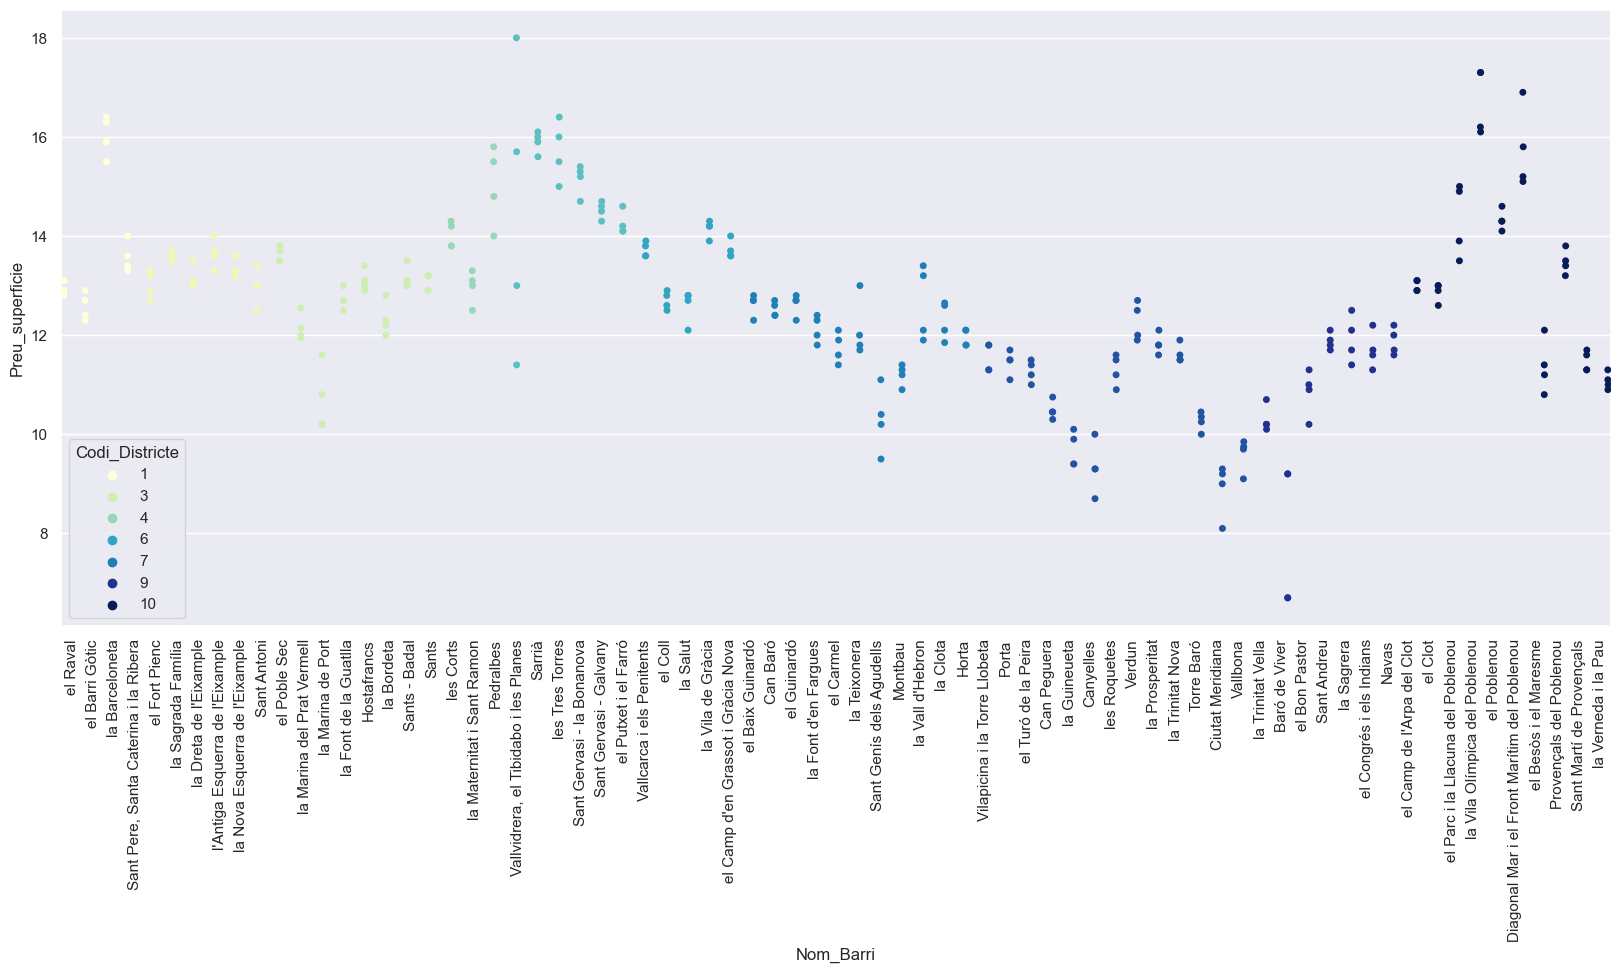

In [78]:
sns.set()
fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.stripplot(x='Nom_Barri', y='Preu_superficie', data=df_alquiler, hue='Codi_Districte', palette='YlGnBu', dodge=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.savefig('Precio de Superficie por Barrio')

## Ejercicio 2

### Exporta los gráficos como imagenes o como HTML


En este ejercicio, decidimos exportar los gráficos como imagenes _".jpg"_.  Para poder hacerlo, aplicamos el método `.savefig(' ')` dentro del código para crear cada gráfica. 

A continuación presentamos una lista del código y nombre de las gráficas:

In [ ]:
#plt.savefig('Alquileres por Distrito.png')
#plt.savefig('Número de Barrios por Distrito')
#plt.savefig('Precios por Mes y Superficie')
#plt.savefig('Analisis por Precio por Distrito')
#plt.savefig('Analisis por Superficie por Distrito')
#plt.savefig('Información General por Distrito')
#plt.savefig('Densidad de Precio por Superficie')
#plt.savefig('Precio por Distrito')
#plt.savefig('Precio por Trimestres')
#plt.savefig('Precio de Superficie por Barrio')

## Ejercicio 3

### Propón alguna visualización que creas que puede resultar interesante.

A continuación presento dos gráficas que no había usado.  

La primera de _Violin_ con la información de _Precio por mes por Distrito_ y la segunda un _Heatmap_ con la correlación de las variantes numéricas del dataset, que en este caso son _Precio por mes_ y _Precio por superficie_ y _Trimestre_ que se cambio.

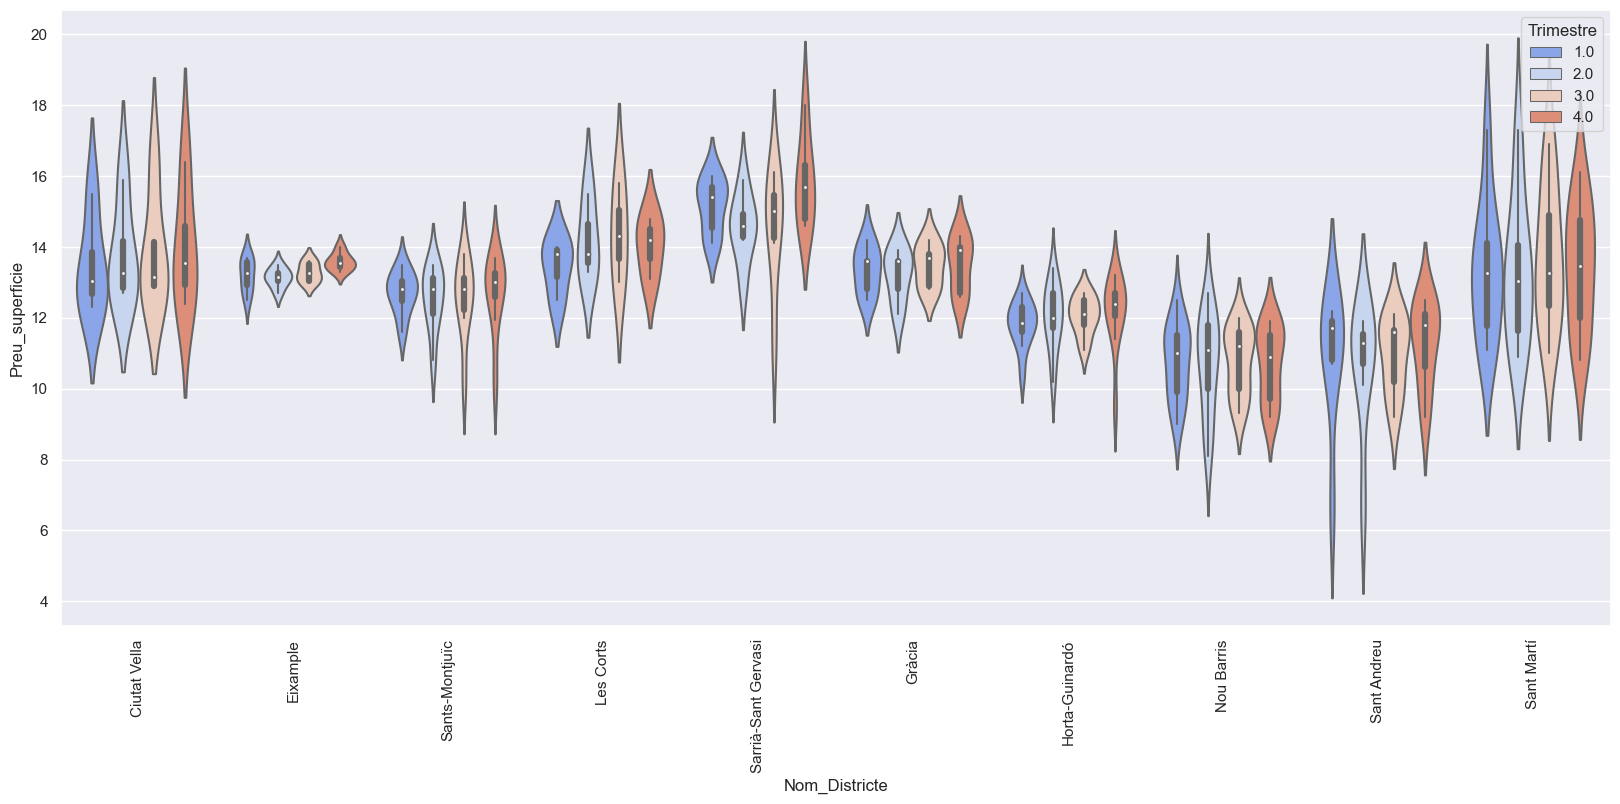

In [91]:
fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.violinplot(x='Nom_Districte', y='Preu_superficie', data=df_alquiler, hue='Trimestre', palette='coolwarm', dodge=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.savefig('Diagrama Violin')
plt.show()

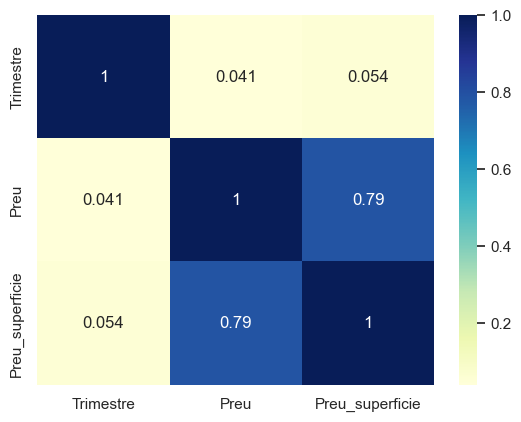

In [93]:
sns.heatmap(df_alquiler.corr(), annot=True, cmap='YlGnBu')
plt.savefig('Heatmap')

# FIN